**1. Cделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?**

Можно накручивать сколь угодно сложные сети, невозможно добиться какого либо нового функционала не имея подготовленных данных. Например ImageNet, в свое время, позволил сделать прорывы как в классификации объектов, так и в исследованиях обнаружения. Новый (не новый :) ) набор данных MS COCO способен решать следующие исследовательские задачи: обнаружение non-iconic представлений объектов, контекстуальных рассуждений между объектами и точной 2D-локализации объектов.

Набор данных Microsoft Common Objects in COntext (MS COCO) содержит 91 категорию общих объектов, причем 82 из них имеют более 5000 помеченных экземпляров. В общей сложности набор данных содержит 2 500 000 помеченных экземпляров в 328 000 изображениях. При этом набор данных содержит не отдельные изображения с категориями, как cifar-10, cifar-100, изображения содержат несколько объектов, на фоне сложных повседневных сцен.

Поскольку обнаружение многих объектов, таких как солнцезащитные очки, мобильные телефоны или стулья, сильно зависит от контекстуальной информации, важно, чтобы наборы данных обнаружения содержали объекты в их естественной среде обитания. В наборе данных MS COCO изображения, богатые контекстуальной информацией. В других наборах данных классы распределены неравномерно (стена: 20 213, окно: 16 080, стул: 7 971, лодка: 349, самолет: 179, торшер: 276), в MS COCO гарантируют, что каждая категория объектов имеет значительное число экземпляров. Чтобы обеспечить практический сбор значительного числа экземпляров в каждой категории, MS COCO ограничили метками категорий, которые обычно используются людьми при описании объектов (собака, стул, человек).

Набор разбит на 11 супер категорий, 91 подкатегорию.

**2. Запустите детектор (ssdMobile_v2 или faster_rcnn, или любой другой детектор) для своей картинки и попробуйте найти 10 объектов, 100 объектов.**

In [2]:
#Импорт всего

# Currently %tensorflow_version 2.x installs beta1, which doesn't work here.
# %tensorflow_version can likely be used after 2.0rc0  
#!pip install tf-nightly-gpu-2.0-preview
#!pip install tf-nightly-gpu-2.0-preview
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time
%matplotlib inline

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: 


In [3]:
from google.colab import files

In [4]:
import cv2 as cv

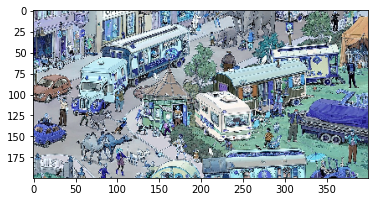

In [6]:
#Читаем картинку
im = cv.imread('/content/test.jpg')
    
# размеры изображения
newH = 200  #высота
newW = int(im.shape[1]*200/im.shape[0]) # ширина 
#сжатая картинка
im = cv.resize(im, (newW, newH)) 
#Выводим 

plt.imshow(im)
plt.show()

In [7]:
#Настройка модели
cv.setUseOptimized(True) #режим оптимизации
cv.setNumThreads(6)      #количество потоков

In [8]:
# Объект Selective Search Segmentation
sss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

# запускаем с картинкой
sss.setBaseImage(im)
  
# Выбираем точный метод 
sss.switchToSelectiveSearchQuality()

# Делаем selective search segmentation 
rects = sss.process() 
#вернёт массив прямоугольников, гдевозможно что-то есть
print(rects.shape) #число найденых объектов

(6764, 4)


**Попробуем найти 10 объектов**

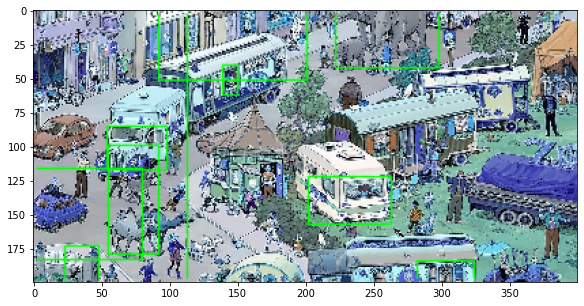

In [9]:
#Построим области

num_Rects = 10 #число выводимых region proposals (прямоугольников)

#создаем копию исходной картинки
im_ = im.copy()

for i, rect in enumerate(rects): 
  if (i < num_Rects): #пока не больше 
    # x,y - координаты левого верхнего угла; w, h - ширина и высота области
    x, y, w, h = rect
    # рисуем рамку      
    cv.rectangle(im_, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA) 
  else: 
    break 

# Рисуем на экран
plt.figure(figsize=(16,5))
plt.imshow(im_) 
plt.show()

**Попробуем найти 100 объектов**

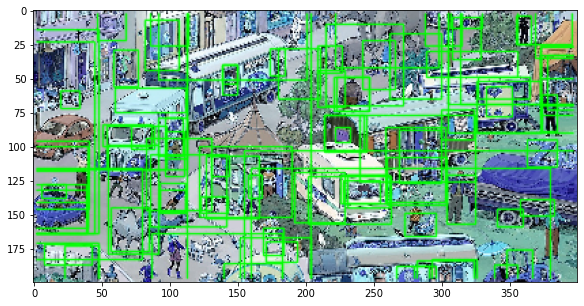

In [10]:
#Построим области

num_Rects = 100 #число выводимых region proposals (прямоугольников)

#создаем копию исходной картинки
im_ = im.copy()

for i, rect in enumerate(rects): 
  if (i < num_Rects): #пока не больше 
    # x,y - координаты левого верхнего угла; w, h - ширина и высота области
    x, y, w, h = rect
    # рисуем рамку      
    cv.rectangle(im_, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA) 
  else: 
    break 

# Рисуем на экран
plt.figure(figsize=(16,5))
plt.imshow(im_) 
plt.show()

In [11]:
root_path = './' #change dir to your project folder 